## In this file we will use None Linear to predict amount of co2 emissions :)))))

In [36]:
# import modules.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [37]:
# First we read our data.
Data = pd.read_csv('Data/FuelConsumption.csv')
Data


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


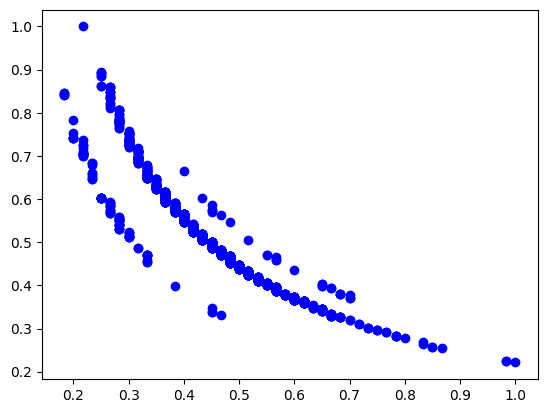

In [38]:
# We get our required data and normalize it.
x_data, y_data = (Data["FUELCONSUMPTION_COMB_MPG"].values, Data["CO2EMISSIONS"].values)
# Normalizing Data.
x_data = x_data/max(x_data)
y_data = y_data/max(y_data)
plt.scatter(x_data, y_data, color ="blue")
plt.show()

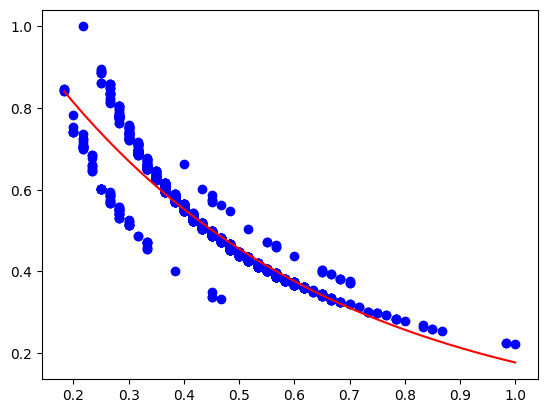

In [39]:
# We have to create a function.
def func(x, a, b, c, d):
    return a * d * np.exp(-b * x) + c
# Use curve_fit to get best parameters for our function.
ppot, pocv = curve_fit(func, x_data, y_data) 
# Create 'x' parameter for our line.
x = np.linspace(11, 60, 55)
# Normalizing 'x'.
x = x/max(x)
# Create 'y' parameter for our line with best parameters.
y = func(x, *ppot)
plt.scatter(x_data, y_data, color="blue")
plt.plot(x,y,"r-")
plt.show()


In [40]:
# Spilit data to train and test.
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=4)
# Use train and test for 'curve_fit'.
ppot, pocv = curve_fit(func, train_x, train_y) 
# Get resulte.
Y_hat = func(test_x, *ppot)

print(r2_score(Y_hat, test_y).round(2))

0.82
